This notebook aims to create a machine learning classification model for the project. 

The idea behind this notebook is to first of all found a dataset, then to train and test a model.
The notebook goes as follow:
1. [Dataset](#Dataset)
2. [HOG](#Hog)
3. [Training](#Training)

# Downloading datasets

In [8]:
# Clone project
!git clone https://github.com/adrienloizeau/car_dectector.git

# Install datasets
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Downloading datasets
!kaggle datasets download -d prondeau/the-car-connection-picture-dataset
!kaggle datasets download -d brsdincer/vehicle-detection-image-set
!kaggle datasets download -d adrienloizeau/train-dataset

# Unzipping datasets
!pip install unzip
!mkdir the-car-connection-picture-dataset
!mkdir train-dataset
!mkdir vehicle-detection-image-set
!unzip /content/the-car-connection-picture-dataset.zip -d the-car-connection-picture-dataset
!unzip /content/train-dataset.zip -d train-dataset
!unzip /content/vehicle-detection-image-set.zip -d vehicle-detection-image-set


fatal: destination path 'car_dectector' already exists and is not an empty directory.


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: vehicle-detection-image-set/data/vehicles/4414.png  
  inflating: vehicle-detection-image-set/data/vehicles/4415.png  
  inflating: vehicle-detection-image-set/data/vehicles/4416.png  
  inflating: vehicle-detection-image-set/data/vehicles/4417.png  
  inflating: vehicle-detection-image-set/data/vehicles/4418.png  
  inflating: vehicle-detection-image-set/data/vehicles/4419.png  
  inflating: vehicle-detection-image-set/data/vehicles/442.png  
  inflating: vehicle-detection-image-set/data/vehicles/4420.png  
  inflating: vehicle-detection-image-set/data/vehicles/4421.png  
  inflating: vehicle-detection-image-set/data/vehicles/4422.png  
  inflating: vehicle-detection-image-set/data/vehicles/4423.png  
  inflating: vehicle-detection-image-set/data/vehicles/4424.png  
  inflating: vehicle-detection-image-set/data/vehicles/4425.png  
  inflating: vehicle-detection-image-set/data/vehicles/4426.png  

# Dataset

To found a good dataset we first of all started to work with a commonly used dataset with cars in it: "the-car-connection-picture-dataset".

In [9]:
import numpy as np 
import pandas as pd
import os

In [10]:
from pathlib import Path

class config:
    IMG_PATH = "/content/the-car-connection-picture-dataset"
    ORIGINAL_PROJECT_PATH ="/content/train-dataset/train"
    ORIGINAL_PROJECT_LABELS = "/content/train-dataset/train.csv"
    FINAL_DATASET ="/content/vehicle-detection-image-set/data"

## The car connection picture dataset

Loading the data in a dataset

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision import transforms
from torch.utils.data import Dataset

class CarDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.transform_img = transforms.Compose([transforms.ToTensor()])
        self.files = []
        self._get_files()

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = Path(self.img_dir) / Path(self.files[idx])
        image = read_image(img_path.as_posix())
        if self.transform:
            image = self.transform(image)
        return image
    
    def _get_files(self):
        p = Path(self.img_dir).glob('**/*')
        self.files = sorted([x.name for x in p if x.is_file()])

        
cars_dataset = CarDataset(config.IMG_PATH)

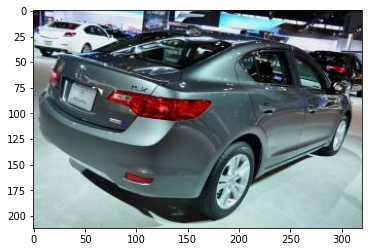

In [12]:
fig, ax = plt.subplots()
ax.imshow(np.transpose(cars_dataset[0],(1,2,0)))

### Checking the dataset

The size of all the images

In [13]:
cars_dataset.files[1]

'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Cvl.jpg'

In [14]:
import pandas as pd
from tqdm import tqdm

shapes = []

# See the size of all the pictures
for count, im in tqdm(enumerate(cars_dataset)):
    rgb, h, w = im.shape
    shapes.append([cars_dataset.files[count],rgb, h , w])
    
shapes_df = pd.DataFrame(shapes,columns = ["path","RGB","h","w"])
shapes_df.head()

64467it [00:47, 1362.94it/s]


,path,RGB,h,w
0,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,212,320
1,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320
2,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320
3,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320
4,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...,3,240,320


In [15]:
print("Unique values for the Heights:",shapes_df["h"].unique())
print("Unique values for the Width:",shapes_df["w"].unique())

Unique values for the Heights: [212 240 213 202 205 224 214 207 200 211 209 234 241 175 203 480 201 160
 223 181 206 233 239 182 194 216 148 186 164 210 220 190 185 169 196 208
 187 193 180 204 177 243 192 154 235 221 219 260 231 468 215 599 188 230
 228 149 197 217 253 218 198 232 479 179 189 176 183 195 178 167 156 191
 199 226 452 158 163 170 134 247 469 157 184 152 225 174 161 155 172 320
 168 173 504 141 150 245 438 426 236 229 162 227 222 171 387 449 166 276
 238 385 281 147 153 254 246 463 263 248 297 306 375 308 277 237 299 310
 257 261 165 251 406 119 132 317 159 250 135 274 430 323 120 272 137 389
 501 144 106 322 249 301 473 483 488 331 344 267 442 256 121 139 151 312
 444 481 298 592 140 292 138 128 278 288 275 382 270 100 115 268 146 273
 133 271 286 340 724 145 295 258 425 123 129 289 446 266 252 477 364 458
 255 264 345 409 269 439 116 265 330 113 110 334 126 309 142 259 136 130
 348 244 336 561 427 378 362 302 402 359 104 125 105 396 413 111 392 540
 539 491 131 397 499

Widths are unique and not the heights

Heights: 240    40388
213    14014
212     1677
239      613
160      572
       ...  
330        1
409        1
345        1
458        1
474        1
Name: h, Length: 304, dtype: int64


Text(0.5, 1.0, 'Percentage of Heights')

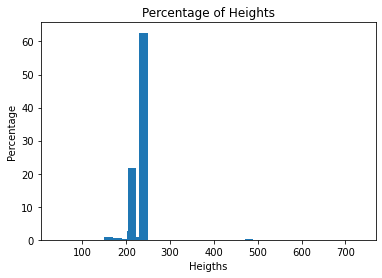

In [16]:
print("Heights:", shapes_df["h"].value_counts())

fig, ax = plt.subplots()
labels = shapes_df["h"].value_counts().index
values = (shapes_df["h"].value_counts() / len(shapes_df["h"])) *100
ax.bar(labels, values,20)
ax.set_xlabel("Heigths")
ax.set_ylabel("Percentage")
plt.title("Percentage of Heights")

**14000 data is enought for training a model, we will only keep the 213x320 datas**

In [17]:
final_df = shapes_df["path"].loc[shapes_df["h"] == 213]
final_df

9        Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
11       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
12       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
13       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
15       Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
                               ...                        
64443    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64448    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64451    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64456    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64462    smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
Name: path, Length: 14014, dtype: object

### Final dataset with same size images

In [18]:
cars_dataset.files = final_df.values

In [19]:
print("Dataset size:",len(cars_dataset))

Dataset size: 14014


# Second part: Founding a labeled "no car" dataset


For the "no car" labeled dataset, we take the original dataset of the assignement and extract the images where their are no cars labeled. The idea is then to take these images, do data augmentation and finally add them to our dataset.

1. Importing the images

In [20]:
df_original_dataset_labels = pd.read_csv(config.ORIGINAL_PROJECT_LABELS)
nb_empty_images = df_original_dataset_labels["bounding_boxes"].isna().sum()
print("Number of images without any car:",nb_empty_images)

df_empty_images = df_original_dataset_labels.loc[df_original_dataset_labels["bounding_boxes"].isna()]

# Reseting the index to 0
df_empty_images = df_empty_images.reset_index()

Number of images without any car: 182


Having a look at the images

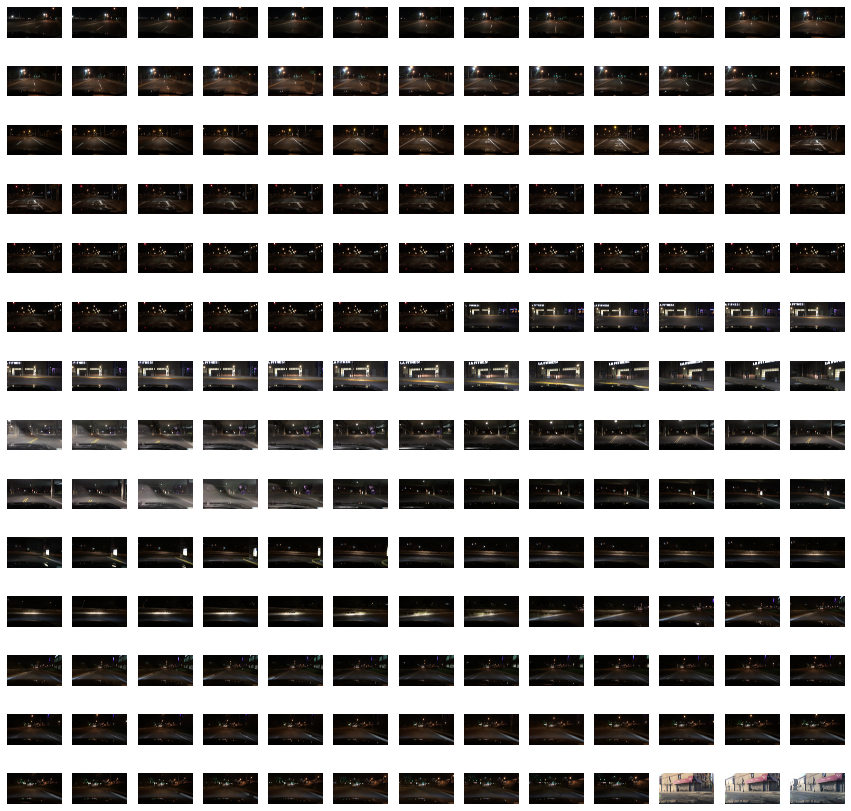

In [21]:
n_images = len(df_empty_images)
n_rows = int(np.ceil(np.sqrt(n_images)))
n_cols = int(np.ceil(n_images / n_rows))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
for i in range(n_images):
    img = read_image(config.ORIGINAL_PROJECT_PATH +"/"+df_empty_images["frame_id"].iloc[i])
    img = np.transpose(img, (1,2,0))
    ax[i//n_cols, i%n_cols].imshow(img) 
    ax[i//n_cols, i%n_cols].axis('off')
plt.show()


As we can see almost all the pictures are taken at night time. This data isn't usefull for our usecase. We must found some other datas.

At this point we decided to start looking again for a new dataset without cars and ended founding a new perfect dataset for our use case:

## The Vehicule Detection Image Set dataset

This dataset has more than 17000 images labeled "Vehicule" or "Non-vehicule". Let's explore it.

1. Vehicules and non vehicules images

In [22]:
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as T

# Create a dataset without transformation
transform = T.Compose([
        T.ToTensor()])
final_dataset = datasets.ImageFolder(config.FINAL_DATASET, transform)
final_dataloader = DataLoader(final_dataset, batch_size=64, shuffle = True)

print(final_dataset)
print("Classes:", final_dataset.classes)

Dataset ImageFolder
    Number of datapoints: 17760
    Root location: /content/vehicle-detection-image-set/data
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Classes: ['non-vehicles', 'vehicles']


Exploring the dataset

Labels: [1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1]


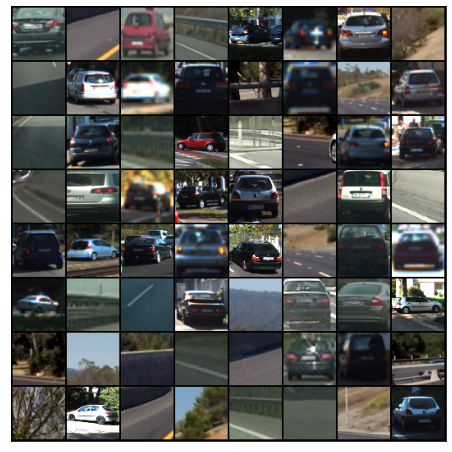

In [23]:
from torchvision.utils import make_grid

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
def show_batch(dl, nmax=64):
    for images, label in dl:
        show_images(images, nmax)
        print("Labels:",label.numpy())
        break

show_batch(final_dataloader)

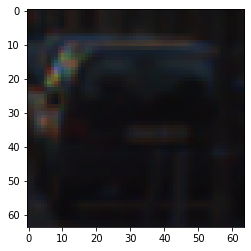

torch.Size([3, 64, 64])


In [24]:
# One single image
images, label = next(iter(final_dataloader))
plt.imshow(images[0].permute(1, 2, 0))
plt.show()
print(images[0].shape)

### Conclusion
- The images are 64x64
- All the images seem to be taken at a different time of the day
- Different distances
- 8000 images for both classes

# Hog

Getting all the files

In [25]:
# List of the non-vehicles files
non_vehicles_path = Path(config.FINAL_DATASET + "/non-vehicles")
p = non_vehicles_path.glob("**/*")
n_v_files = sorted([x.as_posix() for x in p if x.is_file()])

# List of the vehicles files
vehicles_path = Path(config.FINAL_DATASET + "/vehicles")
p = vehicles_path.glob("**/*")
v_files = sorted([x.as_posix() for x in p if x.is_file()])

print("Non-Vehicles files:\n",n_v_files[:10])
print("\nVehicles files:\n",n_v_files[:10])

Non-Vehicles files:
 ['/content/vehicle-detection-image-set/data/non-vehicles/extra1.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra10.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra100.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1000.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1001.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1002.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1003.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1004.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1005.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra1006.png']

Vehicles files:
 ['/content/vehicle-detection-image-set/data/non-vehicles/extra1.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra10.png', '/content/vehicle-detection-image-set/data/non-vehicles/extra100.png', '/content/vehicle-detection-image-s

## Creating a dataset

In [26]:
# Creating the files list
files = n_v_files + v_files

# Creating the labels list 
n_v_label = np.zeros(len(n_v_files))
v_label = np.ones(len(v_files))
labels = np.concatenate((n_v_label, v_label),axis = 0)

df_dataset_raw = pd.DataFrame(data= {"path":files,"labels":labels})

### Getting the HOG for the dataset

For one image

Length of the features:  14400


<ipython-input-48-aeaedbe01552>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(3, 3),


Text(0.5, 1.0, 'Image and associated HOG feature')

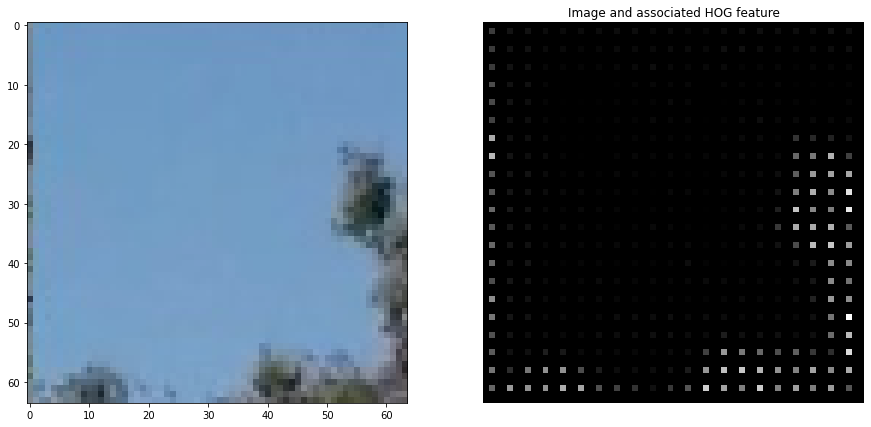

In [48]:
from skimage.feature import hog

# Getting the image
img= np.transpose(read_image(df_dataset_raw["path"].iloc[0]),(1,2,0))

# Creating hog features with dummy parameters
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(3, 3),
    cells_per_block=(2, 2), visualize=True, multichannel=True)

print("Length of the features: ", len(fd))
# plotting
fig, ax = plt.subplots(1,2, figsize= (15,15))
ax[0].imshow(img)
ax[1].axis("off")
ax[1].imshow(hog_image, cmap="gray")
plt.title("Image and associated HOG feature")

### Creating HOG features for each image of the dataset

In [49]:
from skimage.feature import hog

# Define a function to extract HOG features from an image path
def extract_hog_features(img_path, orientations = 9, pixels_per_cell = (3,3), cells_per_block = (2,2)):
    img = np.transpose(read_image(img_path), (1, 2, 0))
    # Extract HOG features with dummy parameters
    fd, hog_image = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block, visualize=True, multichannel=True)
    return fd

# Create a new column in your DataFrame to store the HOG features
df_dataset_raw['hog_features'] = None

# Loop over each row in the DataFrame and extract HOG features for the corresponding image path
for i, row in tqdm(df_dataset_raw.iterrows()):
    img_path = row['path']
    hog_features = extract_hog_features(img_path)

    df_dataset_raw.at[i, 'hog_features'] = hog_features

print(df_dataset_raw)

0it [00:00, ?it/s]<ipython-input-49-27415c80471e>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell,
17760it [18:09, 16.30it/s]

                                                    path  labels  \
0      /content/vehicle-detection-image-set/data/non-...     0.0   
1      /content/vehicle-detection-image-set/data/non-...     0.0   
2      /content/vehicle-detection-image-set/data/non-...     0.0   
3      /content/vehicle-detection-image-set/data/non-...     0.0   
4      /content/vehicle-detection-image-set/data/non-...     0.0   
...                                                  ...     ...   
17755  /content/vehicle-detection-image-set/data/vehi...     1.0   
17756  /content/vehicle-detection-image-set/data/vehi...     1.0   
17757  /content/vehicle-detection-image-set/data/vehi...     1.0   
17758  /content/vehicle-detection-image-set/data/vehi...     1.0   
17759  /content/vehicle-detection-image-set/data/vehi...     1.0   

                                            hog_features  
0      [0.3969168944792361, 0.0, 0.0, 0.0, 0.23159397...  
1      [0.2202361876753174, 0.0, 0.0, 0.0, 0.28901229...  
2     

In [29]:
df_dataset_raw.head()

,path,labels,hog_features
0,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.4138419858777924, 0.10978369375746776, 0.22..."
1,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.214485431312627, 0.22974848165188036, 0.229..."
2,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.26582746599785034, 0.26582746599785034, 0.2..."
3,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.14909098448130004, 0.0593007697394516, 0.03..."
4,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.08682680420030342, 0.020161003289192413, 0...."


Create a shuffled dataset

In [50]:
from sklearn.utils import shuffle
df_dataset = shuffle(df_dataset_raw, random_state= 42).reset_index(drop=True)
df_dataset.head()

,path,labels,hog_features
0,/content/vehicle-detection-image-set/data/vehi...,1.0,"[0.0, 0.0, 0.0, 0.15306542558551356, 0.2949711..."
1,/content/vehicle-detection-image-set/data/vehi...,1.0,"[0.39251742335144296, 0.0, 0.0, 0.145561110623..."
2,/content/vehicle-detection-image-set/data/vehi...,1.0,"[0.08706350475722259, 0.0, 0.0, 0.0, 0.4820561..."
3,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.05374416157924998, 0.0, 0.0, 0.039390845019..."
4,/content/vehicle-detection-image-set/data/non-...,0.0,"[0.022821737729081176, 0.0, 0.0, 0.0, 0.492112..."


In [51]:
df_dataset.to_csv("/content/dataset_33.csv")

#Training

Splitting the dataset


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dataset['hog_features'],df_dataset['labels'], test_size = 0.3, random_state=42)
X_train,  X_test = np.vstack(X_train),np.vstack(X_test)

In [53]:
# Dict to keep track of the performances of the different models we will use
model_eval  = {
    'Model': [],
    'Accuracy': [],
    'F1score': [],
    'Auc': []
}

def add_model_eval(model, accuracy, f1_score, auc):
  """
    Function to add a model to the model_eval array
  """
  model_eval['Model'].append(model)
  model_eval['Accuracy'].append(f'{accuracy: .2f}')
  model_eval['F1score'].append(f'{f1_score: .2f}')
  model_eval['Auc'].append(f'{auc: .2f}')

def view_models_eval():
  """
    Function to display the results of the eval model
  """
  eval_df = pd.DataFrame(model_eval)
  display(eval_df.style.hide_index())

### Training Adaboost classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Fitting the model on the training data
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train) 

# Predicting the value of the test dataset
y_pred = ada_clf.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
add_model_eval("Adaboost raw classifier", acc, f1, auc)
view_models_eval()

Model,Accuracy,F1score,Auc
Adaboost raw classifier,0.91,0.91,0.91


### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the model on the training data
randomf_clf = RandomForestClassifier()
randomf_clf.fit(X_train, y_train) 

# Predicting the value of the test dataset
y_pred = randomf_clf.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
add_model_eval("Random Forest raw classifier", acc, f1, auc)
view_models_eval()

Model,Accuracy,F1score,Auc
Adaboost raw classifier,0.91,0.91,0.91
Random Forest raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94
Extremely Randomized Trees raw classifier,0.94,0.93,0.94
Random Forest raw classifier,0.94,0.93,0.94


### SVM

In [62]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train) 

# Predicting the value of the test dataset
y_pred = svm_clf.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
add_model_eval("SVM raw classifier", acc, f1, auc)
view_models_eval()

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model,Accuracy,F1score,Auc
Adaboost raw classifier,0.91,0.91,0.91
Random Forest raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94
Extremely Randomized Trees raw classifier,0.94,0.93,0.94
Random Forest raw classifier,0.94,0.93,0.94
SVM raw classifier,0.94,0.94,0.94


In [57]:
from sklearn.ensemble import ExtraTreesClassifier

xtrmrandom_clf = ExtraTreesClassifier()
xtrmrandom_clf.fit(X_train, y_train) 

# Predicting the value of the test dataset
y_pred = xtrmrandom_clf.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
add_model_eval("Extremely Randomized Trees raw classifier", acc, f1, auc)
view_models_eval()

Model,Accuracy,F1score,Auc
Adaboost raw classifier,0.91,0.91,0.91
Random Forest raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94
Extremely Randomized Trees raw classifier,0.94,0.93,0.94


### Playing on the parameters

In [58]:
# Fitting the model on the training data
ada_clf_2 = AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate = 0.1)
ada_clf_2.fit(X_train, y_train) 

# Predicting the value of the test dataset
y_pred = ada_clf_2.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
print(f"Adaboost raw classifier, accuracy = {acc}, f1 = {f1}, auc = {auc}")

Adaboost raw classifier, accuracy = 0.8736861861861862, f1 = 0.8660696517412935, auc = 0.8727921265396111


In [59]:
# Fitting the model on the training data
randomf_clf_2 = RandomForestClassifier(criterion = "entropy")
randomf_clf_2.fit(X_train, y_train) 

# Predicting the value of the test dataset
y_pred = randomf_clf_2.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
print(f"Random Forest Classifier raw classifier, accuracy = {acc}, f1 = {f1}, auc = {auc}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-6a996bc132ac>", line 3, in <module>
    randomf_clf.fit(X_train, y_train)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.9/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.9/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.9/dist-packages/joblib/parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.9/di

KeyboardInterrupt: ignored

In [70]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train) 

calibrated_svm = CalibratedClassifierCV(svm_clf, method='sigmoid', cv='prefit')
calibrated_svm.fit(X_train, y_train) 

# Predicting the probability of each class for the test dataset
y_pred = calibrated_svm.predict(X_test)

# Getting the metrics using the predicted probabilities
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
add_model_eval("Calibrated SVM raw classifier", acc, f1, auc)
view_models_eval()


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model,Accuracy,F1score,Auc
Adaboost raw classifier,0.91,0.91,0.91
Random Forest raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94
Extremely Randomized Trees raw classifier,0.94,0.93,0.94
Random Forest raw classifier,0.94,0.93,0.94
SVM raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94
Calibrated SVM raw classifier,0.94,0.94,0.94


Model,Accuracy,F1score,Auc
Adaboost raw classifier,0.91,0.91,0.91
Random Forest raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94
Extremely Randomized Trees raw classifier,0.94,0.93,0.94
Random Forest raw classifier,0.94,0.93,0.94
SVM raw classifier,0.94,0.94,0.94
SVM raw classifier,0.94,0.94,0.94


### Saving models

In [71]:
import pickle

pickle.dump(randomf_clf, open("randomforest_33.model", "wb"))
pickle.dump(calibrated_svm, open("calibratedsvm_33.model", "wb"))

In [41]:
loaded_model = pickle.load(open("randomforest.model", "rb"))

# you can use loaded model to compute predictions
y_predicted = loaded_model.predict(X_test)

# Getting the metrics
acc= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred,)
auc = roc_auc_score(y_test, y_pred)

# Adding the results to the array of results and showing them
print(f"Adaboost raw classifier, accuracy = {acc}, f1 = {f1}, auc = {auc}")

Adaboost raw classifier, accuracy = 0.9724099099099099, f1 = 0.9709313822424364, auc = 0.9718962130661657
